

# Analyzing IMDb Data

---

## Task 

Exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?

How many different actors are in a movie?

## Part 1

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [0]:
movies = pd.read_csv('imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [0]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [0]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [0]:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [0]:
shortest_movie = movies.sort_values(by=['duration']).head(1)
longest_movie = movies.sort_values(by=['duration']).tail(1)

print (shortest_movie)
print (longest_movie)


     star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  
     star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...  


#### Create a histogram of duration, choosing an "appropriate" number of bins.

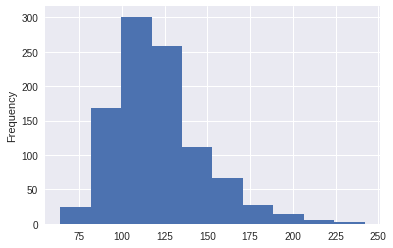

In [0]:
movies['duration'].plot(kind = 'hist', bins = 10);

#### Use a box plot to display that same data.

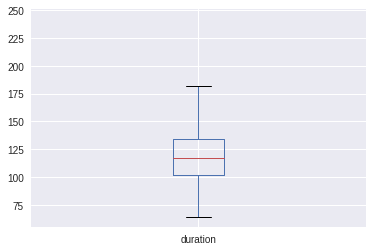

In [0]:
movies['duration'].plot(kind = 'box');

## Part 2

#### Count how many movies have each of the content ratings.

In [0]:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

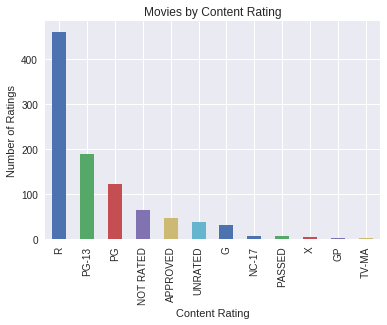

In [0]:
abc = movies['content_rating'].value_counts()
ax = abc.plot(kind='bar')
ax.set_title('Movies by Content Rating')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Number of Ratings');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [0]:
movies['content_rating'] = [ 'UNRATED' if ((x =='NOT RATED') | (x =='APPROVED') | (x =='PASSED') | (x =='GP' )) else x for x in movies['content_rating']]
movies['content_rating']


0            R
1            R
2            R
3        PG-13
4            R
5      UNRATED
6      UNRATED
7        PG-13
8            R
9            R
10       PG-13
11       PG-13
12          PG
13       PG-13
14       PG-13
15       PG-13
16           R
17     UNRATED
18           R
19          PG
20           R
21           R
22     UNRATED
23           R
24           R
25       PG-13
26       PG-13
27           R
28           R
29     UNRATED
        ...   
949         PG
950          R
951          R
952          R
953         PG
954      PG-13
955          R
956         PG
957          R
958      PG-13
959          R
960      PG-13
961          R
962         PG
963          R
964      PG-13
965      PG-13
966      PG-13
967          R
968          R
969          R
970          R
971          R
972      NC-17
973      PG-13
974         PG
975         PG
976      PG-13
977         PG
978          R
Name: content_rating, Length: 979, dtype: object

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [0]:
movies['content_rating'] = [ 'NC-17' if ((y =='X') | (y =='TV-MA')) else y for y in movies['content_rating']]
movies['content_rating']

0            R
1            R
2            R
3        PG-13
4            R
5      UNRATED
6      UNRATED
7        PG-13
8            R
9            R
10       PG-13
11       PG-13
12          PG
13       PG-13
14       PG-13
15       PG-13
16           R
17     UNRATED
18           R
19          PG
20           R
21           R
22     UNRATED
23           R
24           R
25       PG-13
26       PG-13
27           R
28           R
29     UNRATED
        ...   
949         PG
950          R
951          R
952          R
953         PG
954      PG-13
955          R
956         PG
957          R
958      PG-13
959          R
960      PG-13
961          R
962         PG
963          R
964      PG-13
965      PG-13
966      PG-13
967          R
968          R
969          R
970          R
971          R
972      NC-17
973      PG-13
974         PG
975         PG
976      PG-13
977         PG
978          R
Name: content_rating, Length: 979, dtype: object

#### Count the number of missing values in each column.

In [0]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [0]:
movies['content_rating'] = ['UNRATED' if pd.isnull(z) else z for z in movies['content_rating']]
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [0]:
sr_longer = movies[movies.duration >= 120].star_rating.mean()
sr_shorter = movies[movies.duration < 120].star_rating.mean()

print ("average star rating for movies 2 hours or longer -", sr_longer)
print ("average star rating for movies shorter than 2 hours -", sr_shorter)

average star rating for movies 2 hours or longer - 7.948898678414082
average star rating for movies shorter than 2 hours - 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

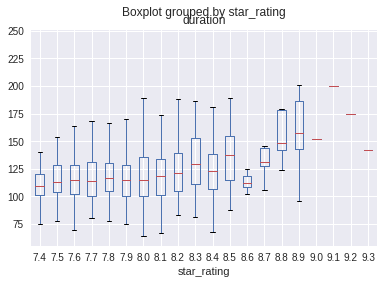

In [0]:
movies.boxplot(column='duration', by='star_rating');

If the movie duration is below 125 minutes, it is more likely to recieve rating.

#### Calculate the average duration for each genre.

In [0]:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Part 3

#### Visualize the relationship between content rating and duration.

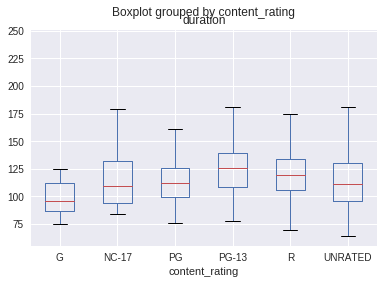

In [0]:
movies.boxplot(column='duration', by='content_rating');

#### Determine the top rated movie (by star rating) for each genre.

In [0]:
#movies.sort_values('star_rating', ascending = False).groupby('genre').title.first()

movies.groupby('genre').title.first()
#movies.head()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [0]:
dupe = movies[movies.title.duplicated()].title
movies[movies.title.isin(dupe)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


Movie name is duplicated but their star_rating, duration, actors_list is different. For example, movie 'Les Miserables'  is duplicated but its genre, duration, star_rating, and even actors_list is different. 

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [0]:
movies.genre.value_counts()
top_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(top_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [0]:
genre_counts = movies.genre.value_counts()
top_genres = genre_counts[genre_counts >= 10].index
movies[movies.genre.isin(top_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [0]:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [0]:
genre_rat = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genre_rat[genre_rat['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [0]:
#movies['actors_list']

from collections import Counter

# Cleaning the data

def clean(string):
  return string.replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]

actors = movies['actors_list'].apply(clean)
#actors

mylist = []
for x in actors:
  mylist.append([y.strip() for y in x.split(',')])
  
#mylist

#Created dictionary to store the actors names with frequency

freq = {}
for actor in mylist:
    for q in actor:
        if q in freq:
            freq[q] +=1
        else:
            freq[q] = 1
#freq

#Sorted the actors name according to their movie counts in descending order.

sorted_keys = sorted(freq, key=freq.get, reverse=True)
for r in sorted_keys:
    print (r, freq[r])

Robert De Niro 18
Clint Eastwood 14
Brad Pitt 14
Tom Hanks 14
Al Pacino 13
Johnny Depp 12
Christian Bale 11
Leonardo DiCaprio 11
Dustin Hoffman 11
Harrison Ford 10
James Stewart 10
Julianne Moore 10
Denzel Washington 10
Jack Nicholson 9
Russell Crowe 9
Sean Connery 9
Ed Harris 9
Ethan Hawke 9
Morgan Freeman 8
Ian McKellen 8
Matt Damon 8
Cary Grant 8
Kate Winslet 8
Michael Caine 8
Bruce Willis 8
Robert Downey Jr. 8
Jake Gyllenhaal 8
Tom Cruise 8
Sean Penn 8
Robert Duvall 7
Ralph Fiennes 7
Edward Norton 7
Humphrey Bogart 7
Scarlett Johansson 7
Jennifer Connelly 7
Tony Chiu Wai Leung 7
Daniel Radcliffe 7
Emma Watson 7
Rupert Grint 7
Geoffrey Rush 7
Cate Blanchett 7
Meryl Streep 7
Samuel L. Jackson 6
Joseph Gordon-Levitt 6
Kevin Spacey 6
Anthony Hopkins 6
William Holden 6
Hugh Jackman 6
Gene Hackman 6
John Goodman 6
Ewan McGregor 6
Daniel Day-Lewis 6
Woody Allen 6
John Wayne 6
Kevin Costner 6
George Clooney 6
Nicolas Cage 6
Tim Robbins 5
Uma Thurman 5
Elijah Wood 5
Liam Neeson 5
Joe Pesci 